# Pre processing Data in python

In [ ]:
#Importando la librería pandas
import pandas as pd
import numpy as np

In [ ]:
url ='https://raw.githubusercontent.com/tec03/Datasets/main/datasets/Cereals.csv'
input = pd.read_csv(url)

###Identificando valores ausentes

In [ ]:
#Generamos una copia de la BD para trabajar sobre esta en todo el ejercicio
df = input.copy()
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [ ]:
#¿falta algún dato?
df.isnull().values.any()

True

In [ ]:
#Contar nulos por variable
df.isnull().sum().sort_values(ascending=True)

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
carbo       1
sugars      1
potass      2
dtype: int64

In [ ]:
#Contando el total de datos faltantes
df.isnull().sum().sum()

4

In [ ]:
#Un valor ausente generalmente se muetra en la BD como "N/A", "0" o simplemente una celda vacía
#Quitar los valores ausentes
#Si ponemos axis=0 quita los renglones con N/A
#Si ponemos axis=1 quita las columnas con N/A
df.dropna(axis=0, inplace=True)

In [ ]:
#¿falta algún dato?
df.isnull().values.any()

False

In [ ]:
#Reemplazar los valores ausentes
#Reemplazo con la media
#Generamos una copia de la BD para trabajar sobre esta en todo el ejercicio
df2 = input.copy()
df2

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [ ]:
#Primero calculamos la medio de la variable donde hay "N/A"
mean = df2["carbo"].mean()
print(mean)

14.802631578947368


In [ ]:
#Reemplazando el valor de la media
df["carbo"].replace(np.nan, mean)

0      5.0
1      8.0
2      7.0
3      8.0
5     10.5
      ... 
72    21.0
73    13.0
74    17.0
75    17.0
76    16.0
Name: carbo, Length: 74, dtype: float64

In [ ]:
#Dando formato a las variables
#Por ejemplo, si pasamos lass calorias a kilo calorias
df2["calories"]=df2["calories"]/1000
df2.rename(columns={"calories":"Kilocalories"}, inplace =True)

In [ ]:
df2.head()

,name,mfr,type,Kilocalories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,0.07,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,0.12,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,0.07,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,0.05,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,0.11,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [ ]:
df2.dtypes

name             object
mfr              object
type             object
Kilocalories    float64
protein           int64
fat               int64
sodium            int64
fiber           float64
carbo           float64
sugars          float64
potass          float64
vitamins          int64
shelf             int64
weight          float64
cups            float64
rating          float64
dtype: object

In [ ]:
#Si queremos convertir una variable de un formato a otro
df2["Kilocalories"] = df2["Kilocalories"].astype("int")

In [ ]:
df2.head()

,name,mfr,type,Kilocalories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,0,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,0,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,0,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,0,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,0,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


###Normalización

In [ ]:
#Generamos una copia de la BD para trabajar sobre esta en todo el ejercicio
df3 = input.copy()
df3

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [ ]:
#Scaling
df3["sodium"]=df3["sodium"]/df["sodium"].max()

In [ ]:
#Min max
df3["fiber"]=(df3["fiber"]-df3["sodium"].min())/(df3["fiber"].max()-df3["fiber"].min())

In [ ]:
#Z-score
df3["sodium"] = (df3["sodium"]-df3["sodium"].mean())/df3["sodium"].std()

###Binning

In [ ]:
#Generamos una copia de la BD para trabajar sobre esta en todo el ejercicio
df4 = input.copy()
df4

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [ ]:
#Conversión de numperico a categórico
bins = np.linspace(min(df4["protein"]),max(df4["protein"]),4)

In [ ]:
group_names = ["low", "medium", "High"]

In [ ]:
df4["protein_bin"] =pd.cut(df4["protein"],bins, labels=group_names, include_lowest=True)

In [ ]:
df4.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,protein_bin
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,medium
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,medium
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,medium
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,medium
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843,low


(array([36.,  0.,  0.,  0.,  0., 38.,  0.,  0.,  0.,  3.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

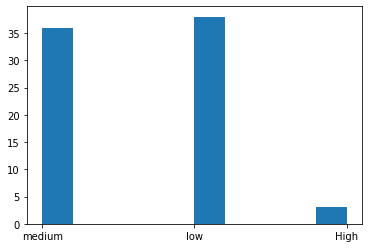

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df4["protein_bin"])

###Convertir variables

In [ ]:
#Generamos una copia de la BD para trabajar sobre esta en todo el ejercicio
df5 = input.copy()
df5

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [ ]:
#De categoría a numérico
#One hot encoding
pd.get_dummies(df5["mfr"])

,A,G,K,N,P,Q,R
0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
72,0,1,0,0,0,0,0
73,0,1,0,0,0,0,0
74,0,0,0,0,0,0,1
75,0,1,0,0,0,0,0


In [ ]:
#Generamos una copia de la BD para trabajar sobre esta en todo el ejercicio
df6 = input.copy()
df6

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [ ]:
mis_df = df6.isnull()

In [ ]:
for column in mis_df.columns.values.tolist():
  print(column)
  print(mis_df[column].value_counts())
  print("")

name
False    77
Name: name, dtype: int64

mfr
False    77
Name: mfr, dtype: int64

type
False    77
Name: type, dtype: int64

calories
False    77
Name: calories, dtype: int64

protein
False    77
Name: protein, dtype: int64

fat
False    77
Name: fat, dtype: int64

sodium
False    77
Name: sodium, dtype: int64

fiber
False    77
Name: fiber, dtype: int64

carbo
False    76
True      1
Name: carbo, dtype: int64

sugars
False    76
True      1
Name: sugars, dtype: int64

potass
False    75
True      2
Name: potass, dtype: int64

vitamins
False    77
Name: vitamins, dtype: int64

shelf
False    77
Name: shelf, dtype: int64

weight
False    77
Name: weight, dtype: int64

cups
False    77
Name: cups, dtype: int64

rating
False    77
Name: rating, dtype: int64



## Evidencia
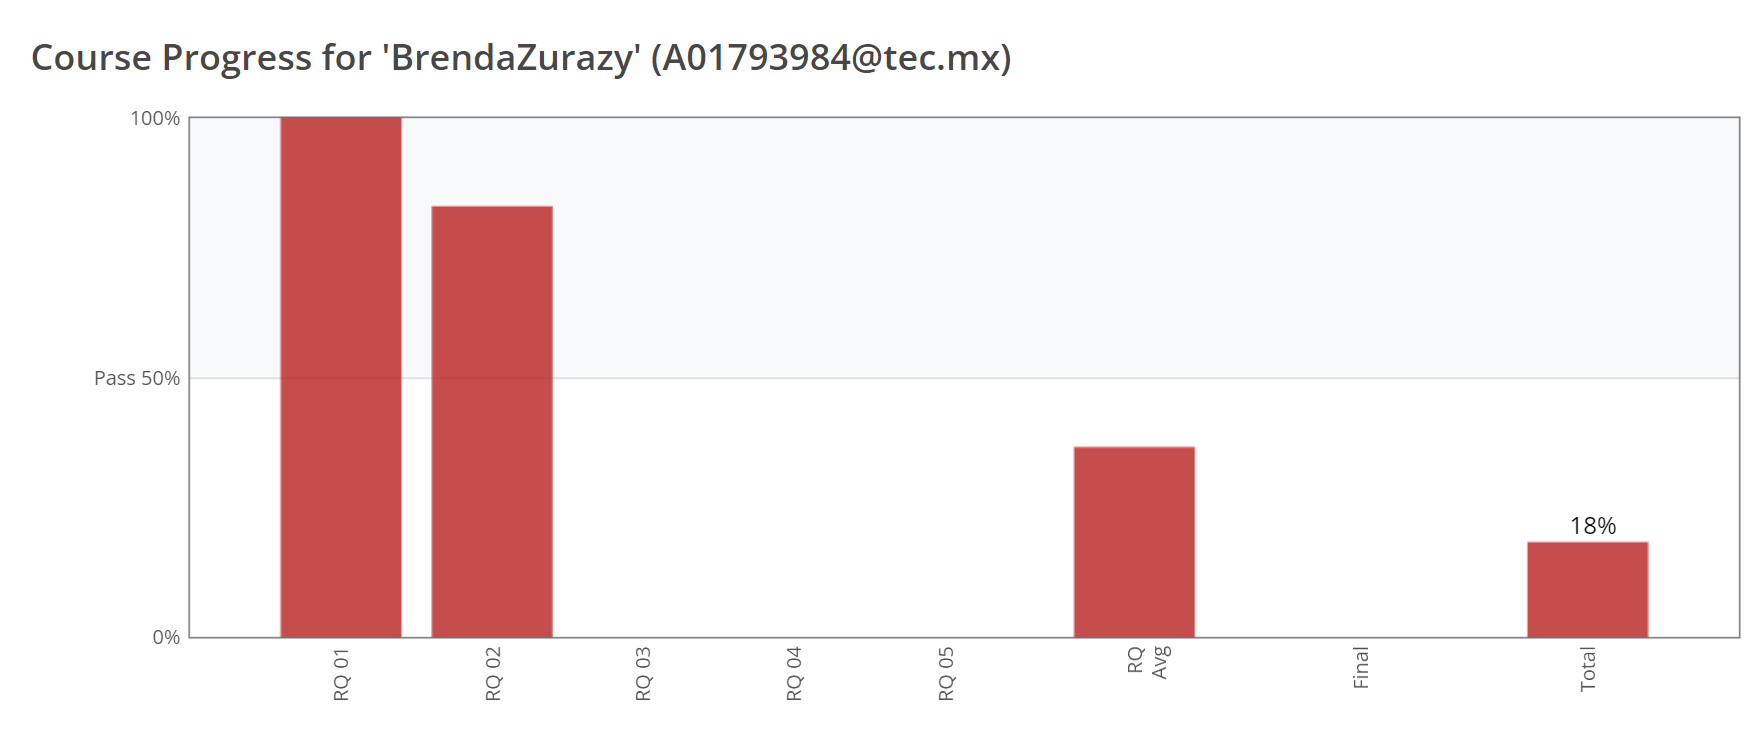